# 5.5.4 Challenge
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
# Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load in data
ess_raw = pd.read_csv('ESSdata_Thinkful.csv')
ess_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess_raw.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

## Question 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

First, in order to determine which distribution comparison test to use, I must determine if the distribution of the variables follows any known distribution or if it is a non-parametric distribution.  To do this, I will plot the histograms of trust for each country in each year.

		***Distribution of Trust from 2012 to 2014 for Six European Countries***


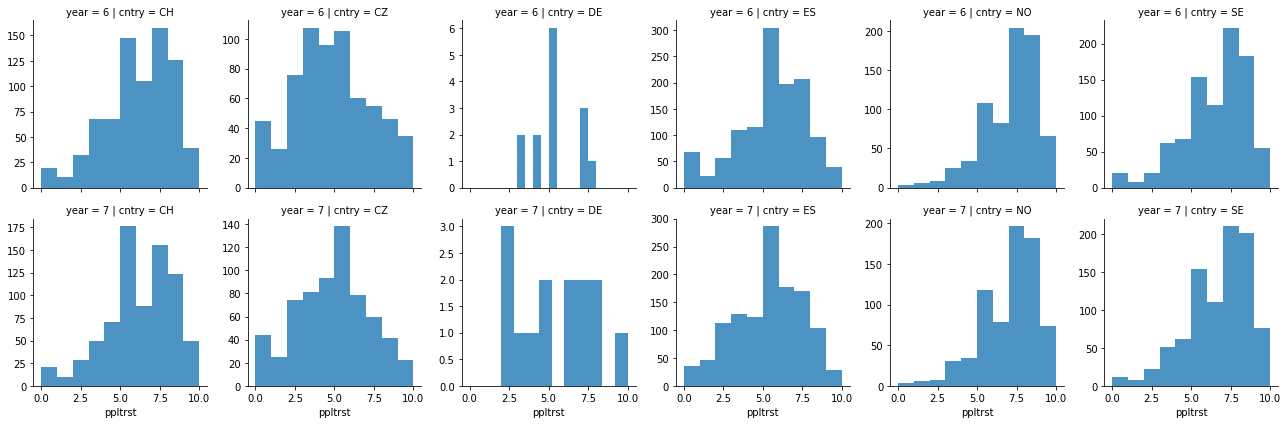

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [4]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
# Adding a title
print('\t\t***Distribution of Trust from 2012 to 2014 for Six European Countries***')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].ppltrst))
    print()    

These all look non-normally distributed, and are thus according to the Shapiro-Wilks test.  The exception is Denmark, which looks approximately normal and has a p-value above our threshhold of 0.05, meaning it is approximately normally distributed.  Unfortunately, with such few entries for Denmark, we might not be able to trust this result.  For these reasons, I will use non-parametric distribution tests to determine if trust has changed from 2012 to 2014.

Since this comparison is for the same group of people and the distributions are non-parametric, I will use the Wilcoxon signed-rank test to determine if there are differences between the distributions over the years.

In [5]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))
    print()

# Also computing t-test statistic for Denmark
ess_DE = ess_raw[ess_raw.cntry =='DE']
print('\nDE t-test:', ttest_ind(ess_DE[ess_DE.year==6].ppltrst, 
                              ess_DE[ess_DE.year==7].ppltrst))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


DE t-test: Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


According to the Wilcoxon signed-rank test, the two countries whose trust in people changed from 2012 to 2014 were Spain and Sweden.  By inspecting the histograms, trust in people in both Sweden and Spain increased, especially in the number of 7-8 ratings.

## Question 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
First, in order to determine which distribution comparison test to use, I must determine if the distribution of the variables follows any known distribution or if it is a non-parametric distribution.  To do this, I will plot the histograms of happiness for each country in each year.

		***Distribution of Happiness from 2012 to 2014 for Six European Countries***


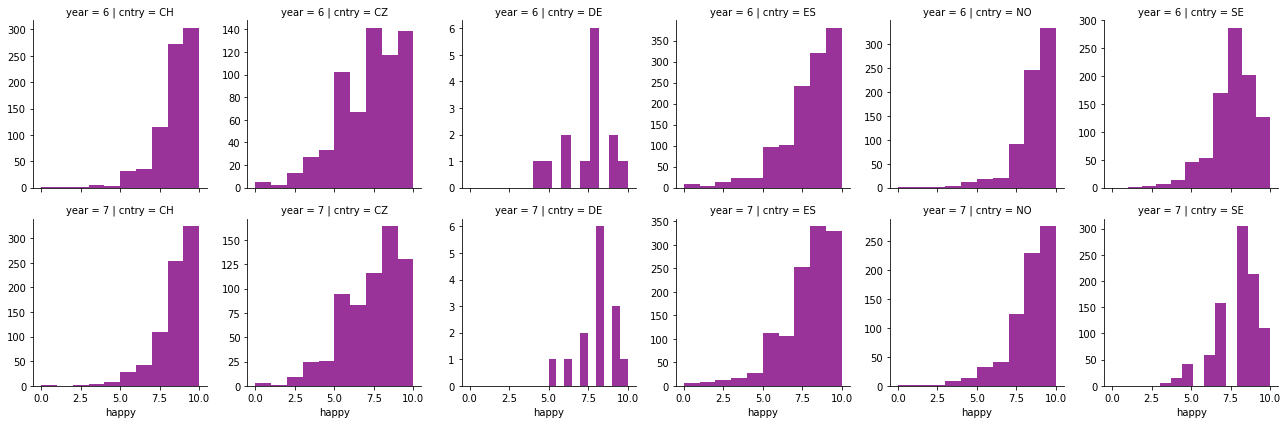

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [6]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='purple')
# Adding a title
print('\t\t***Distribution of Happiness from 2012 to 2014 for Six European Countries***')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))
    print()    

These all look non-normally distributed, and are thus according to the Shapiro-Wilks test.  The exception is Denmark, which looks approximately normal and has a p-value above our threshhold of 0.05, meaning it is approximately normally distributed.  Unfortunately, with such few entries for Denmark, we might not be able to trust this result.  For these reasons, I will use non-parametric distribution tests to determine if happiness has increased from 2012 to 2014.

Again, since this comparison is for the same group of people and the distributions are non-parametric, I will use the Wilcoxon signed-rank test to determine if there are differences between the distributions over the years.

In [7]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, y=ess_temp[ess_temp.year == 7].happy))
    print()
    
# Printing t-test statistic for Denmark
print('\nDE t-test:', ttest_ind(ess_DE[ess_DE.year==6].happy, 
                              ess_DE[ess_DE.year==7].happy))

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


DE t-test: Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


According to the Wilcoxon Signed-Rank tests, the countries whose happiness changed between 2012 and 2014 are the Czech Republic, Norway, and Spain, as those p-values are below the threshhold to reject the null hypothesis that the distributions are the same.  According to the histograms, the happiness of the Czeck Republic and Spain became a more normal distribution, meaning lower initial happiness increased and higher initial happiness decreased. It also appears that happiness in Norway, while initially very happy, generally decreased.

## Question 3. Who reported watching more TV in 2012, men or women?

For this question, we are not comparing the opinions of the same person over time, just men versus women, so these ratings are independent of one another, meaning I can use a t-test or Wilcoxon test to describe the distribution differences.  Now, let's see whether or not these distributions are normally distributed so we can figure out which one to use.

In [8]:
ess_2012 = ess_raw[ess_raw.year == 6]

		***Distribution of Total TV Watching in 2012 for Men and Women***


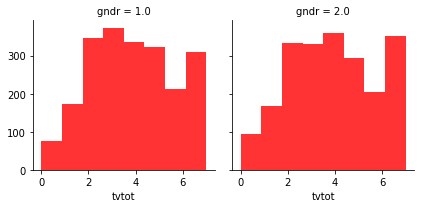

Males (1.0): (0.9434293508529663, 5.994494507539187e-28)
Females (2.0): (0.9390434622764587, 8.488309331265169e-29)


In [9]:
g = sns.FacetGrid(ess_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='red', bins=8)
# Adding a title
print('\t\t***Distribution of Total TV Watching in 2012 for Men and Women***')
plt.show()

print('Males (1.0):', shapiro(ess_2012[ess_2012.gndr ==1].tvtot.dropna()))
print('Females (2.0):', shapiro(ess_2012[ess_2012.gndr ==2].tvtot.dropna()))

According to the Shapiro-Wilks tests and histograms, the distributions of men and women's total tv watching time are not necessarily normally distributed, especially noting the large spike in people who watch more than 3 hours of tv on the weekdays. Because of this, I will again use the Wilcoxon Signed-Rank test to determine if the distributions are different. 

In [10]:
# Printing Wilcoxon Test for TV watching across genders.  Using only first 2014 entries of men to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=ess_2012[ess_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


Because the p-value of the Wilcoxon test is 0.5, which is above 0.05, this means that there is not a significant difference between the tv habits of men in women in this study. Thus, we cannot definitively say who watches more tv.

# Question 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Again, these people are all independent of one another, so I will need to use a t-test or a Wilcoxon test to determine if the distributions are different from one another.  Let's now check for normality to determine which one to use.

		***Distribution of Fairness in 2012 for People who Live with and without a Partner***


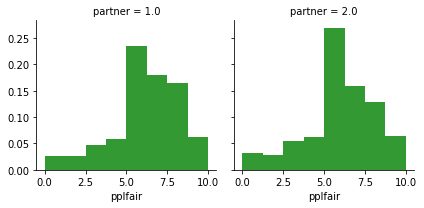

Lives with Partner (1.0): (0.94523686170578, 2.068099309311279e-30)
Lives Alone (2.0): (0.9332861304283142, 2.8958550733254737e-26)


In [11]:
g = sns.FacetGrid(ess_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='green', bins=8, normed=True)
# Adding a title
print('\t\t***Distribution of Fairness in 2012 for People who Live with and without a Partner***')
plt.show()

print('Lives with Partner (1.0):', shapiro(ess_2012[ess_2012.partner ==1].tvtot.dropna()))
print('Lives Alone (2.0):', shapiro(ess_2012[ess_2012.partner ==2].tvtot.dropna()))

According to the Shapiro-Wilks tests and histograms, the distributions of people living with and without partners's belief in people's fairness are not necessarily normally distributed, especially noting the skewed nature towards higher belief in fairness. Because of this, I will again use the Wilcoxon Signed-Rank test to determine if the distributions are different. 

In [12]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=ess_2012[ess_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


According to the Wilcoxon test, there is a significant difference between the two distributions. It's difficult to tell from the histograms which has a higher median value of belief in fairness, so let's check out the median values for each.

In [13]:
print('Median Fairness for People living with Partners:', ess_2012[ess_2012.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', ess_2012[ess_2012.partner == 2].pplfair.median())


Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


It appears that in 2012, people who lived with partners had a greater belief that people were fair than people who live alone. 

# Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Since I will be choosing 3 or 4 countries, and knowing these countries are independent of one another, I will either be using a one-way or Mood’s median test or Kruskal-Wallis test, depending on the distribution of the data, so let's check it out.

Let's use the Czech Republic, Spain, Norway, and Sweden as our countries.

In [14]:
# Pulling out the countries in 2014
country_list = ['CZ','ES','NO','SE']
ess_c = ess_raw[(ess_raw.cntry.isin(country_list)) & (ess_raw.year == 7)]

		***Distribution of Social Meetings from 2014 for Four European Countries***


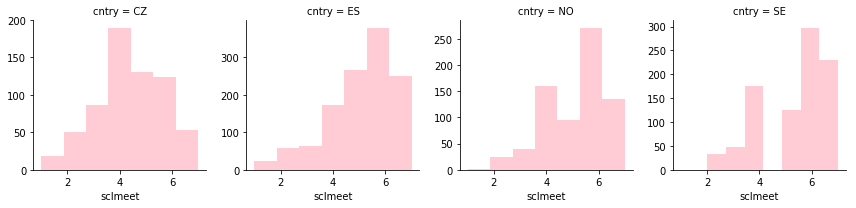

Shapiro Tests for Normality
CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)

SE (0.8798282146453857, 6.682967662559975e-26)



In [15]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='pink', bins=7)
# Adding a title
print('\t\t***Distribution of Social Meetings from 2014 for Four European Countries***')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    #print(cnt, shapiro(ess_c[ess_c.c ==year].happy))
    print()    

According to the Shapiro tests, none of these countries have normally distributed data from people's social habits.  Because of this, I will need to use either Mood’s median test or the Kruskal-Wallis test. I will choose the Kruskal-Wallis test for this as it does more than determining if data points are above or below the median.

In [16]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=199.91509305978323, pvalue=4.400563536291911e-43)


Based on the Kruskal test, I know that the distributions of social meetings are different from one another.  To determine which are different, I need to run t-tests for all distributions against each other.

In [17]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
CZ vs SE: Ttest_indResult(statistic=-13.471687937687198, pvalue=3.252593934148172e-39)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
ES vs SE: Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


According to the t-tests:
- Spain and Norway are not significantly different, 
- Norway and Sweden are slightly different from one another,
- Czech Republic is significantly different from Spain, Norway, and Sweden,
- Spain and Sweden are significantly different from one another.

This means that Czech Republic is a standout country, with fewer social meetings with others than most other countries.

# Question 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Since I will be choosing 3 or 4 countries, and knowing these countries are independent of one another, I will either be using a one-way or Kruskal-Wallis test, depending on the distribution of the data, so let's check it out.

I will continue to use the same countries as in question 5.

		***Distribution of Social Activities from 2014 for Four European Countries***


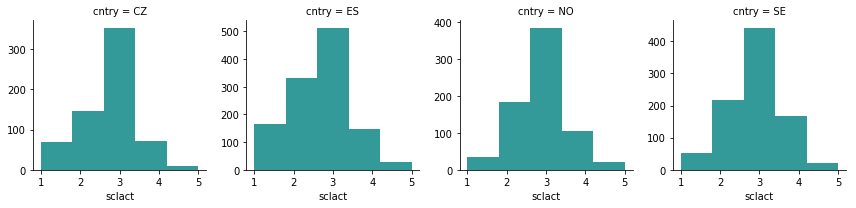

Shapiro Tests for Normality
CZ (0.8517600893974304, 3.2631608025549396e-24)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)

SE (0.8822488784790039, 1.283228571387991e-25)



In [18]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)
# Adding a title
print('\t\t***Distribution of Social Activities from 2014 for Four European Countries***')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Printing Shapiro test results
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclact.dropna()))
    print()    

According to the Shapiro tests, none of these countries have normally distributed data from people's social activities.  Because of this, I will use the Kruskal-Wallis test for this.

In [19]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=53.809701709377876, pvalue=1.2319673584021775e-11)


Based on the Kruskal test, I know that the distributions of social activities are different from one another.  To determine which are different, I need to run t-tests for all distributions against each other.

In [20]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

CZ vs ES: Ttest_indResult(statistic=1.9231457887987455, pvalue=0.05461649785517343)
CZ vs NO: Ttest_indResult(statistic=-3.44673561169421, pvalue=0.0005844634540645623)
CZ vs SE: Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.580214302799725e-05)
ES vs NO: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
ES vs SE: Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
NO vs SE: Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)


According to the t-tests:
- Norway and Sweden are not significantly different, 
- Czech Republic and Spain are slightly different from one another,
- Czech Republic is significantly different from Sweden and Norway,
- Spain is significantly different from Sweden, and Norway.

This means that Czech Republic and Spain are the standouts as for social activities, with both having fewer social activities than most. 